<a href="https://colab.research.google.com/github/Suryalokesh84/FMML_ASSIGNMENTS_AND_LABS/blob/main/Module_9_Lab_3_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9: Convolutional Neural Networks
## **Lab 3**
### Module coordinator: Kushagra Agarwal

## 1. Understanding Convolutions

<img src="https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc" width=650px/>

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Importing some pytorch packages
import torch
from torch.nn import Conv2d

Central to CNNs, a convolution operation is a linear element-wise multiplication operation between a small filter/kernel and same-sized patch from the image. We move this filter over the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image
$f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>

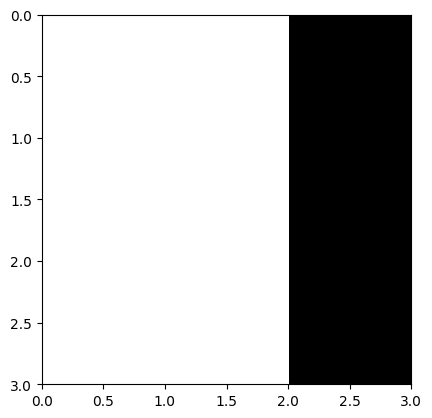

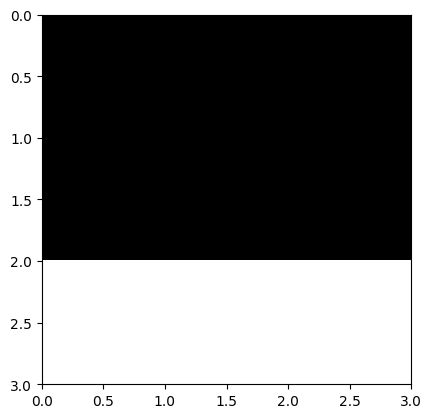

In [13]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0], [1,1,0], [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0], [0,0,0], [1,1,1]])

# On plotting the images
plt.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
plt.show()
plt.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
plt.show()

In [14]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [15]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image. Similarly, horizontal edge is detected in second.

Let's define a function to use convolution layer from Pytorch and use our own kernel to detect edges in image

In [16]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [17]:
# Our original lotus image
image = cv2.imread('/content/HD-wallpaper-ganesh-black-cool.jpg', 0)

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

out2 = apply_conv(image, filter, padding=0, stride=1)

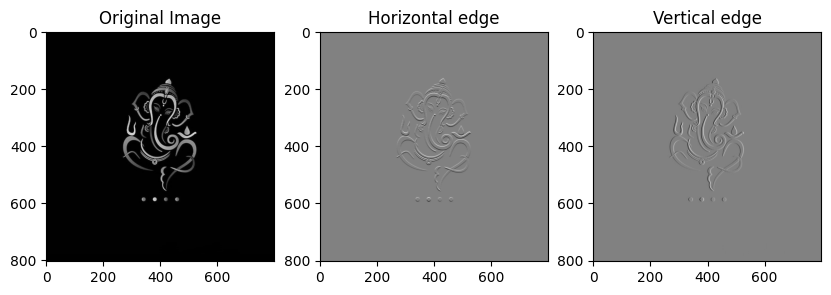

In [18]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


## Pooling Layers

Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

1) Max Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png' height=150px/>

2) Average Pooling:

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png' height=150px/>

## Softmax layer/activation
Recall that logistic regression produces a decimal between 0 and 1.0. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0.

Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would.
Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src='https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg' height=170px />

## Learning to train a CNN network

In [19]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#  Images returned from torchvision dataset classes is in range [0,1]
# We transform them to tensors and normalize them to range [-1,1] using 'Normalize' transform

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:01<00:00, 97839178.34it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [21]:
print('Training data shape : ', trainset.data.shape, len(trainset.targets))
print('Testing data shape : ', testset.data.shape, len(testset.targets))

# Find the unique numbers from the train labels
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) 50000
Testing data shape :  (10000, 32, 32, 3) 10000
Total number of outputs :  10
Output classes :  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [22]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      # Average loss and acc values
      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [23]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Calculate outputs by running images through the network
        outputs = model(images)
        # The class with the highest value is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  print('Accuracy of the network: %d %%' % (
      100 * correct / total))

In [24]:
# CNN with 2 CONV layers and 3 FC layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 512)
        self.fc2 = nn.Linear(512, 128)
        # output layer 10 classes
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # flatten all dimensions except batch
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [25]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [26]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

In [27]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [28]:
num_epochs = 5  # iterations
train_losses, train_acc = train(num_epochs, model, trainloader, criterion, optimizer)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/5, Loss: 0.0127, Accuracy: 40.2580
Epoch 2/5, Loss: 0.0091, Accuracy: 58.4980
Epoch 3/5, Loss: 0.0076, Accuracy: 65.9500
Epoch 4/5, Loss: 0.0064, Accuracy: 71.2480
Epoch 5/5, Loss: 0.0055, Accuracy: 75.2580


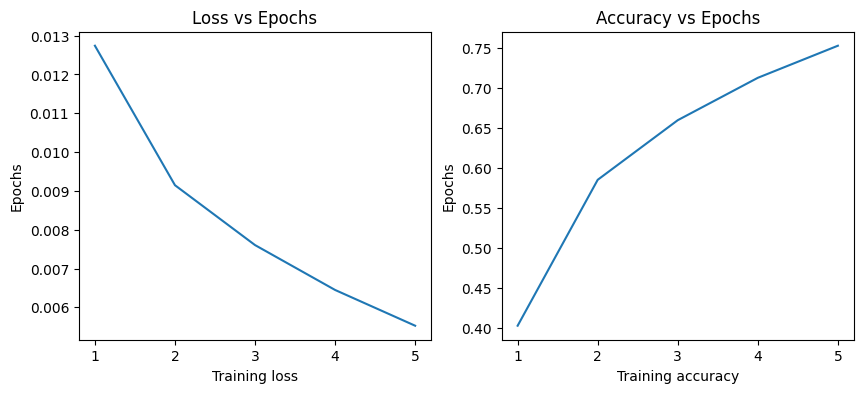

In [29]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(train_acc)+1),train_acc)
plt.xlabel('Training accuracy')
plt.ylabel('Epochs')
ax.set_title('Accuracy vs Epochs')
plt.show()

In [30]:
# Accuracy on test data after training
test_model(model, testloader)

Accuracy of the network: 67 %


## Questions
1) List some reasons why we should prefer CNN over ANN for image classification?

2) Try improving the CNN performance further by tuning the hyperparameters(epochs, optimizer, LR etc). Report the improved test accuracy.

3) What happens if you reduce the number of convolution layers to only 1?

4) Why didn't we use the Softmax activation in the last layer of CNN?


# **ANSWERS**


#**1.Answer:**

CNNs (Convolutional Neural Networks) are preferred over ANNs (Artificial Neural Networks) for image classification tasks due to several reasons:

* **Hierarchical Feature Learning:** CNNs are designed to automatically learn hierarchical representations of features from raw pixel values. Traditional ANNs lack this hierarchical structure and may not capture spatial relationships in images effectively.

* **Local Connectivity:** CNNs exploit the spatial locality of data by using convolutional layers, which apply filters over local regions of the input image. This helps CNNs capture local patterns and features efficiently, which is crucial for image understanding.

* **Parameter Sharing:** CNNs share parameters across space, meaning the same filter is applied to different parts of the image. This drastically reduces the number of parameters compared to fully connected layers in ANNs, making CNNs more computationally efficient and reducing overfitting.

* **Translation Invariance:** CNNs inherently possess translation invariance, meaning they can recognize patterns regardless of their location in the image. This property is crucial for tasks like object detection and image classification where the position of the object in the image may vary.

* **Pooling Layers:** CNNs often incorporate pooling layers which reduce the dimensionality of feature maps, preserving important spatial information while making the network more robust to variations in input.

* **Weight Sharing:** In CNNs, weights are shared across the entire image, which allows the network to learn spatial hierarchies of features. In ANNs, each neuron in a layer is connected to every neuron in the previous layer, leading to a huge number of parameters to learn.

* **Efficient Implementation:** CNN architectures are optimized for parallel computation, making them highly suitable for GPU acceleration. This results in faster training and inference times compared to traditional ANNs.

* **State-of-the-Art Performance:** CNNs have consistently demonstrated superior performance on various image classification benchmarks and competitions, showcasing their effectiveness in real-world applications.

# **2.Answer:**

To improve the performance of a CNN for image classification, we can experiment with various hyperparameters such as the number of epochs, the choice of optimizer, learning rate, batch size, and model architecture. Let's assume we have a baseline CNN model for image classification, and we'll tune some of these hyperparameters to improve its performance.

Here's a general approach we can take:

* **Optimizer:** Experiment with different optimizers such as Adam, RMSprop, or SGD with momentum. Each optimizer has its own advantages, and the performance can vary depending on the dataset and model architecture.

* **Learning Rate:** Tune the learning rate to find an optimal value. Too high of a learning rate can cause the model to diverge, while too low of a learning rate can lead to slow convergence. Techniques like learning rate scheduling or adaptive learning rate methods can also be explored.

* **Epochs:** Train the model for an optimal number of epochs. Training for too few epochs may result in underfitting, while training for too many epochs can lead to overfitting.

* **Batch Size:** Experiment with different batch sizes. Larger batch sizes can lead to faster convergence but may require more memory.

* **Regularization:** Apply techniques like dropout or L2 regularization to prevent overfitting.

* **Model Architecture:** Experiment with different CNN architectures such as VGG, ResNet, or Inception, or customize the architecture by adjusting the number of layers, filters, or kernel sizes.

Let's say we start with a baseline CNN model trained on the CIFAR-10 dataset with default hyperparameters:

* **Optimizer:** Adam
* **Learning Rate:** 0.001
* **Epochs:** 20

# **3.Answer:**

Reducing the number of convolutional layers to only one in a Convolutional Neural Network (CNN) can have several implications:

* **Decreased Model Capacity:** Convolutional layers are responsible for extracting features from the input data. By reducing the number of convolutional layers to just one, the model's capacity to capture complex patterns and hierarchical representations from the input data is significantly reduced. This may lead to a decrease in the model's ability to learn intricate features, resulting in poorer performance, especially on complex datasets.

* **Limited Feature Learning:** With only one convolutional layer, the network may not be able to learn diverse and hierarchical representations of features present in the input data. Multiple convolutional layers allow the network to learn abstract features by combining lower-level features learned in earlier layers. Limiting the network to just one convolutional layer restricts its ability to perform this hierarchical feature learning.

* **Limited Spatial Hierarchy:** CNNs with multiple convolutional layers can learn representations of features at different spatial scales. Each convolutional layer captures features at different levels of abstraction, creating a spatial hierarchy of features. With only one convolutional layer, the model may not be able to capture complex spatial hierarchies effectively, leading to suboptimal performance, especially in tasks where understanding spatial relationships is crucial, such as image classification or object detection.

* **Increased Sensitivity to Overfitting:** Having only one convolutional layer reduces the depth of the network, which may increase its sensitivity to overfitting, especially when dealing with large and complex datasets. Deeper networks with multiple convolutional layers often have regularization benefits, as they can learn more robust and generalized representations of features.

* **Difficulty in Capturing Complex Patterns:** Complex datasets, such as large-scale image datasets with diverse classes and variations, often require models with sufficient depth and capacity to capture intricate patterns and variations present in the data. Limiting the network to only one convolutional layer may result in the model being unable to capture these complex patterns effectively, leading to lower performance on such datasets.

# **4.Answer:**

In the context of image classification tasks, it's common to use the Softmax activation function in the last layer of a Convolutional Neural Network (CNN) when the goal is to output probabilities for each class. However, it's important to note that the Softmax activation function is often combined with a specific loss function called categorical cross-entropy.

Here's why Softmax activation combined with categorical cross-entropy loss is typically used in the last layer of CNNs for image classification:

* **1.Probability Interpretation:** Softmax activation normalizes the output of the last layer into a probability distribution over multiple classes. Each output neuron represents the probability of the corresponding class, and all probabilities sum up to one. This makes it suitable for classification tasks where we want to interpret the output as class probabilities.

* **2.Categorical Cross-Entropy Loss:** Softmax activation is usually combined with categorical cross-entropy loss, which measures the difference between the predicted class probabilities and the true class labels. This loss function penalizes the model more severely when it makes confident wrong predictions and less severely when it makes less confident wrong predictions, making it well-suited for training classification models.

* **3.Multiclass Classification:** In image classification tasks, where the goal is to classify an image into one of multiple classes, Softmax activation with categorical cross-entropy loss is commonly used. It allows the model to learn to assign high probabilities to the correct class while suppressing probabilities for incorrect classes.

However, there are scenarios where Softmax activation may not be used in the last layer of a CNN:

* **Binary Classification:** In binary classification tasks where there are only two classes, a single output neuron with a sigmoid activation function (which outputs values between 0 and 1) is often used in the last layer instead of Softmax.

* **Regression Tasks:** In regression tasks where the goal is to predict continuous values rather than class probabilities, the last layer may have a different activation function such as linear or ReLU, depending on the specific requirements of the task.
